In [1]:
library(tidyverse)
library(paqueteadp)
library(haven)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.1     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
datos_CEP <- read_spss("datos/base_85.sav")

Primero, la percepción de las personas es de relevancia en un país es un aspecto relevante para tomar en cuenta. Muchas veces la interpretación individual no se considere con la realidad, como lo puede ser en casos del aumento de disminución de la delincuencia, sin embargo, esto no significa que no deba ser un punto de atención en las políticas públicas.

La pregunta etiquetada como bienestar_2, dice lo siguiente: Considerando todas las cosas, ¿cuán satisfecho está usted con su vida en este momento? Por favor use esta tarjeta en que 1 significa que usted está “totalmente insatisfecho” y 10 significa que usted está “totalmente satisfecho”. ¿Dónde se ubicaría usted?

Elaborando un gráfico de barras con los datos presentados, se tiene que:


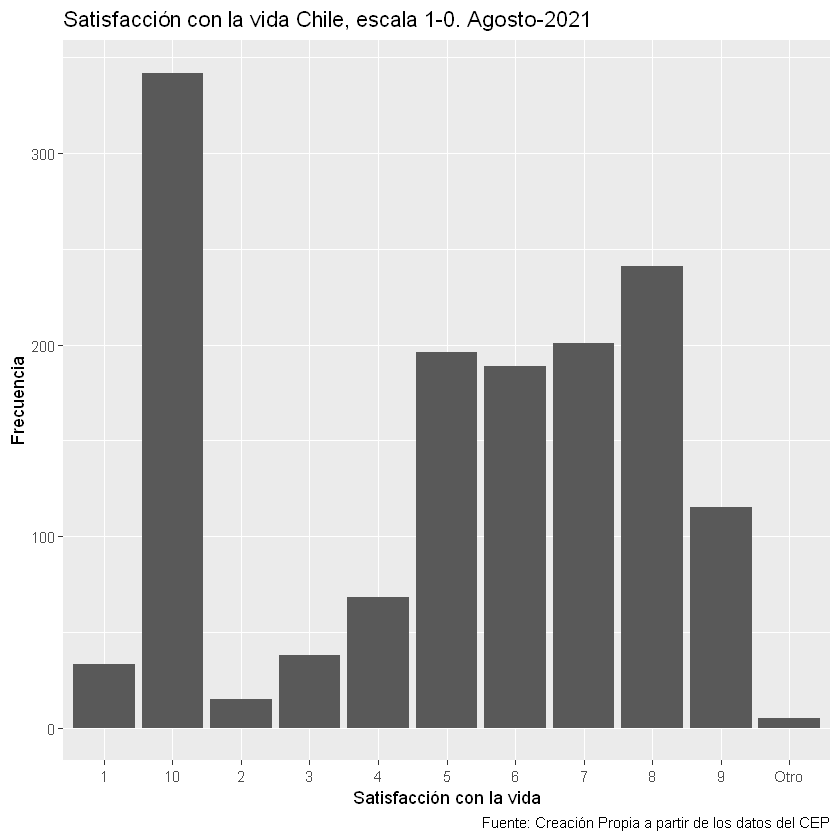

In [3]:
datos_CEP <- datos_CEP %>% mutate(satisfaccion_vida = case_when(
                   bienestar_2 == 1 ~ "1",
                   bienestar_2 == 2 ~ "2",
                   bienestar_2 == 3 ~ "3",
                   bienestar_2 == 4 ~ "4",
                   bienestar_2 == 5 ~ "5",
                   bienestar_2 == 6 ~ "6",
                   bienestar_2 == 7 ~ "7",
                   bienestar_2 == 8 ~ "8", 
                   bienestar_2 == 9 ~ "9",
                   bienestar_2 == 10~ "10",  
                   TRUE ~ "Otro" )) 

datos_CEP %>% ggplot(mapping = aes(x = satisfaccion_vida))+
                  geom_bar()+
                  labs(title = "Satisfacción con la vida Chile, escala 1-0. Agosto-2021",
                       x = "Satisfacción con la vida",
                       y = "Frecuencia",
                       caption = "Fuente: Creación Propia a partir de los datos del CEP")

La mayoría de la gente se encuentra totalmente satisfecha con su vida. Sumado a esto, elaborando un gráfico que contenga dos niveles, siendo estos los datos contenidos entre 1-5 y 6-10, se observa que, con una notable diferencia, las personas en Chile, a la fecha de realizado el estudio, se encuentran más satisfechos que insatisfechos.

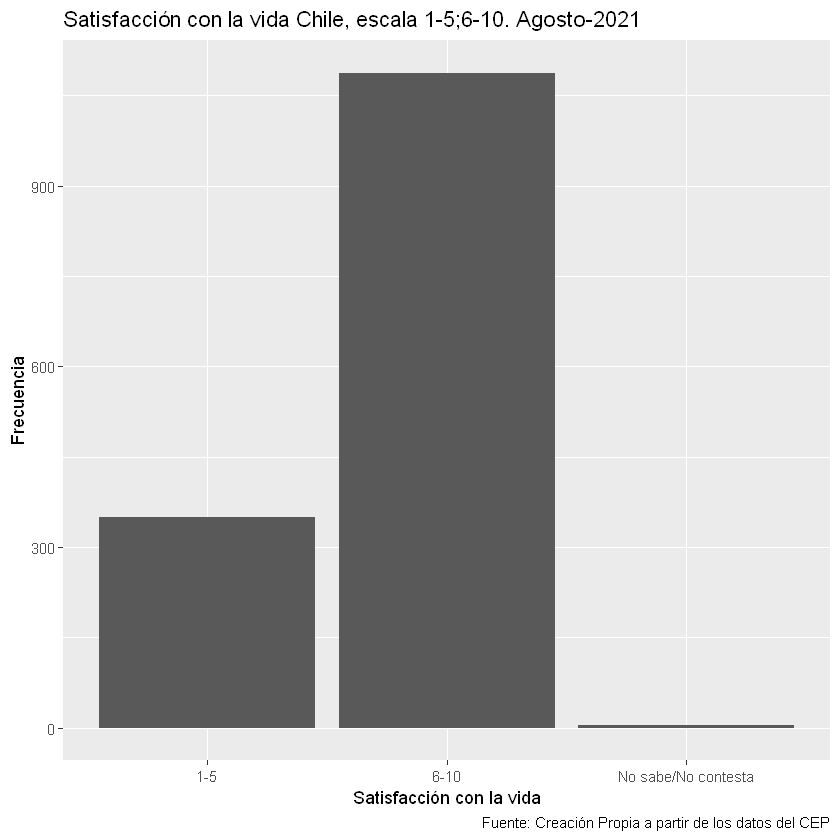

In [4]:
datos_CEP <- datos_CEP %>% mutate(satisfaccion_vida_bin = case_when(
                   bienestar_2 %in% c(1:5) ~ "1-5",
                   bienestar_2 %in% c(6:10)~ "6-10",
                   TRUE ~ "No sabe/No contesta")) 

datos_CEP %>% ggplot(mapping = aes(x = satisfaccion_vida_bin))+
                  geom_bar()+
                  labs(title = "Satisfacción con la vida Chile, escala 1-5;6-10. Agosto-2021",
                       x = "Satisfacción con la vida",
                       y = "Frecuencia",
                       caption = "Fuente: Creación Propia a partir de los datos del CEP")                  

Los resultados resultan contrarios a los esperados, considerando el período de cambio político en el que se encuentra Chile, y la ocurrencia del Estallido Social, es de esperar que las personas sientan una insatisfacción no solamente con el sistema político, sino también con sus vidas. En vista de lo observado, se intuye que existen factores externos al estado nacional que le dan satisfacción a la vida de las personas.  

Finalmente, buscando indagar sobre si la satisfacción con la vida podría correlacionarse con la tendencia política del personal. En primera instancia, no es posible identificar ninguna relación, de hecho, la mayoría de las personas señala que no sabe o no contesta.

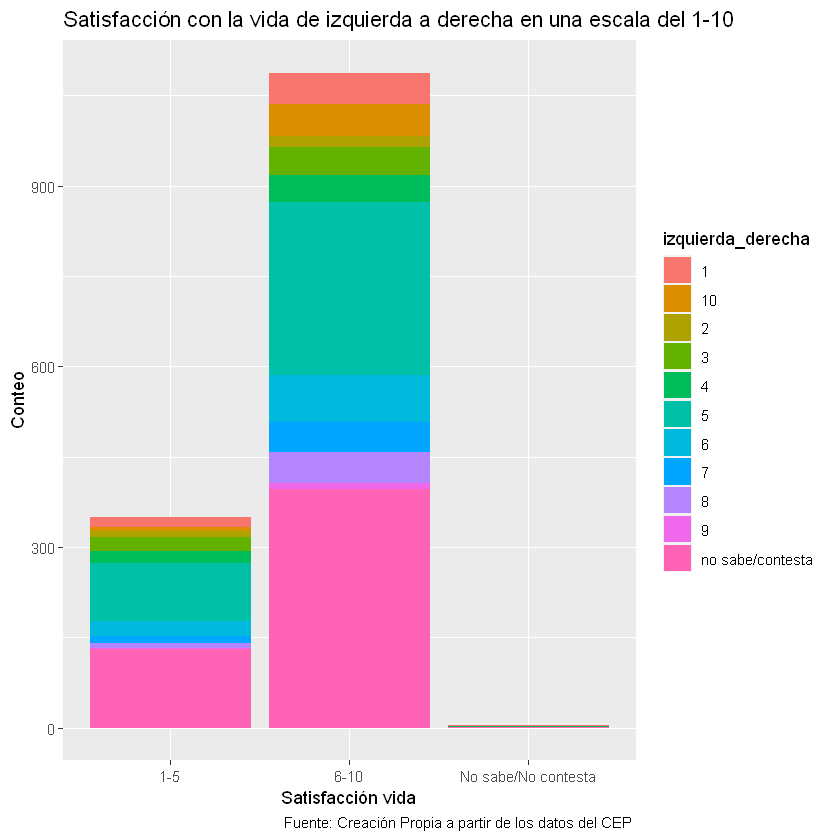

In [5]:
datos_CEP <- datos_CEP %>% mutate(izquierda_derecha = case_when(
                                iden_pol_2 == 1 ~ "1",
                                iden_pol_2 == 2 ~ "2",
                                iden_pol_2 == 3 ~ "3",
                                iden_pol_2 == 4 ~ "4",
                                iden_pol_2 == 5 ~ "5",
                                iden_pol_2 == 6 ~ "6",
                                iden_pol_2 == 7 ~ "7",
                                iden_pol_2 == 8 ~ "8",
                                iden_pol_2 == 9 ~ "9",
                                iden_pol_2 == 10 ~ "10",
                                TRUE ~ "no sabe/contesta"))

datos_CEP %>% ggplot(mapping = aes(x = satisfaccion_vida_bin, fill = izquierda_derecha))+
                geom_bar()+
                labs(title = "Satisfacción con la vida de izquierda a derecha en una escala del 1-10",
                    caption = "Fuente: Creación Propia a partir de los datos del CEP ",
                    x = "Satisfacción vida",
                    y = "Conteo")  

Usando la base bienestar, contenida en el paqueteadp del libro AnálizaR Datos Políticos. Se compara la relación entre la población y el PIB de los países contenidos en la base de datos. Se observa que existe una tendencia, y es que, a mayor población, menor PIB.

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 194 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 194 rows containing missing values (geom_point)."


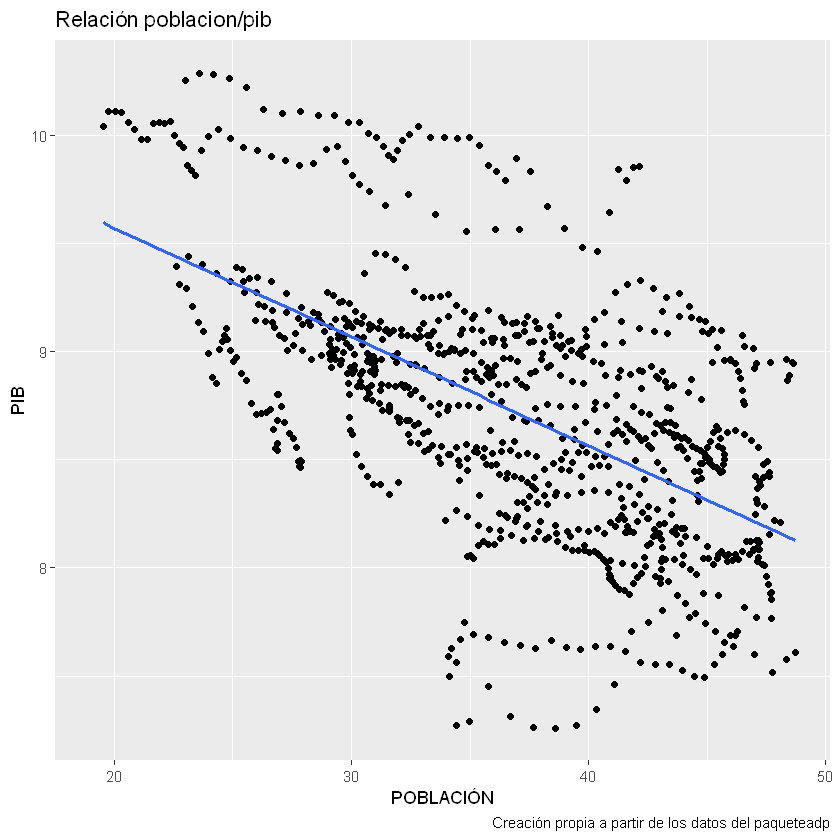

In [8]:
bienestar %>% ggplot(mapping = aes(x= poblacion, y = log(pib)   ))+
                geom_point()+
                geom_smooth(method = "lm", se = F)+
                labs(title = "Relación poblacion/pib",
                        x = "POBLACIÓN",
                        y = "PIB",
                        caption = "Creación propia a partir de los datos del paqueteadp")